**1. Importing the Libraries**

In [1]:
import pandas as pd

**2. Importing the Dataset**

In [2]:
data = pd.read_csv('heart.csv')

**3. Taking care of missing values**

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**4. Taking care of Duplicate values**

In [4]:
data_dup= data.duplicated().any()
data_dup

True

In [5]:
data= data.drop_duplicates()

In [6]:
data_dup= data.duplicated().any()
data_dup

False

**5. Data Processing**

In [7]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [8]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**6. Encoding Categorical Data**

In [10]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
cate_val.remove('sex')
cate_val.remove('target')


In [12]:
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [13]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**7. Feature Scaling**

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st= StandardScaler()
data[cont_val]= st.fit_transform(data[cont_val])

In [17]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**8. Splitting the Dataset into the Training set and Test set**

In [18]:
X = data.drop('target',axis=1)

In [19]:
y = data['target']

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

In [22]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [23]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**9. Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred1= log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

**14. XG boost**

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier

In [30]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred7= xgb_model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred7)

0.7868852459016393

**10. SVC (Support Vector Classifier)**

In [34]:
from sklearn import svm

In [35]:
svm = svm.SVC()

In [36]:
svm.fit(X_train,y_train)

SVC()

In [37]:
y_pred2= svm.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

**11. K-Neighbors Classifier**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn= KNeighborsClassifier()

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred3 = knn.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [44]:
score = [] 

for k in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [45]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [46]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

**Non-Linear ML Algorithms**

In [47]:
data = pd.read_csv('heart.csv')

In [48]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
data = data.drop_duplicates()

In [50]:
data.shape

(302, 14)

In [51]:
X = data.drop('target',axis=1)
y = data['target']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

**12. Decision Tree Classifier**

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred4= dt.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

**13. Random Forest Classifier**

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [60]:
rf = RandomForestClassifier()

In [61]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3, error_score='raise')

In [62]:
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred: {e}")

# Get the best parameters and the best estimator if no error occurred
if grid_search.best_params_:
    best_params = grid_search.best_params_
    best_rf = grid_search.best_estimator_

    print("Best Parameters: ", best_params)

    # Evaluate the best model on the test set
    y_pred5 = best_rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred5)
    print(f"Accuracy after hyperparameter tuning: {accuracy * 100:.2f}%")

    # Save the best model using joblib
    #joblib.dump(best_rf, 'best_model_joblib_heart_rf')
else:
    print("GridSearchCV did not complete successfully.")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy after hyperparameter tuning: 83.61%


In [63]:
#rf.fit(X_train,y_train)

In [64]:
#y_pred5 = rf.predict(X_test)

In [65]:
#accuracy_score(y_test,y_pred5)

**14. Gradient Boosting Classifier**

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier()

In [68]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [69]:
y_pred6 = gbc.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [71]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB','XGB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6),
                                 accuracy_score(y_test,y_pred7)]})

In [72]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.704918
4,RF,0.836066
5,GB,0.803279
6,XGB,0.786885


In [73]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

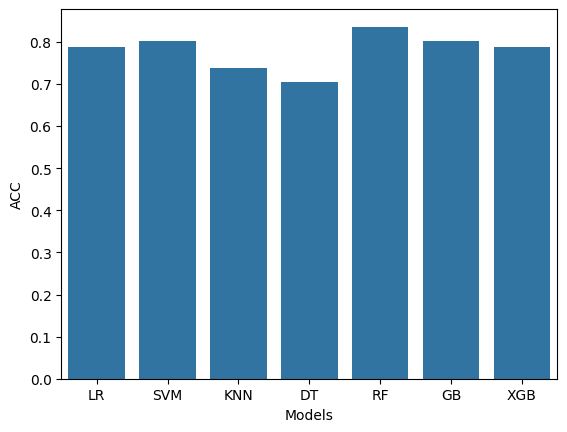

In [74]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


In [75]:
X = data.drop('target',axis=1)
y = data['target']

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

**PREDICTION ON NEW DATA**

In [78]:
import pandas as pd

In [79]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [80]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [81]:
p=rf.predict(new_data)
if p[0]==0:
    print('No probability of having heart disease')
else:
    print('Do have probability of heart disease')

No probability of having heart disease


**SAVING MODEL USING JOBLIB**

In [82]:
import joblib

In [83]:
joblib.dump(rf,'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [84]:
model = joblib.load('heart_disease_model.pkl')

In [85]:
model.predict(new_data)

array([0], dtype=int64)